Written By Soner Kar 

# IMPORTS

In [ ]:
import scipy
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 
import random
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [ ]:
def xray(x ):
    # !pip install -U varname
    # from varname import varname, nameof
    # name= nameof(x)

    import torch
    import numpy as np


  #   if not a:
  # print("List is empty")
    if isinstance(x, list):
      if isinstance(x[0], torch.Tensor):
        print("List of Tensors,", " Len:", len(x), ", e[0] shape:" , x[0].shape  )
      else:
        print("List,", " Len:", len(x), ", Type-e[0]:" , type(x[0])  )
    elif isinstance(x, (np.ndarray, np.generic) ):
        print("np.array,", " Shape:", x.shape )    
    elif isinstance(x, dict):
      e=list(x.values())[0]
      k=list(x.keys())[0]
      print("Dict,", "Len:", len(x), " Keys (Tensor): ", k.shape, " Values (Tensor): " , e.shape  )
    elif isinstance(x, tuple):
       if isinstance(x[0], torch.Tensor):
          print("Tuple of Tensors,", " Len:", len(x), ", e[0] shape:" , x[0].shape  )
       else:
          print("Tuple,", " Len:", len(x), ", Type-v[0]:" , type(x[0])  )


    elif isinstance(x, torch.Tensor):
        print("Tensor,", " Shape:", x.shape  )

#GET DATA

In [ ]:
!git clone https://github.com/karaposu/EEG_biometric_identification.git

# ! cp  /content/EEG_biometric_identification   . 


fatal: destination path 'EEG_biometric_identification' already exists and is not an empty directory.
cp: cannot stat '/content/EEG_biometric_identification*.mat': No such file or directory


#LOAD DATA

In [ ]:
PATH= '/content/EEG_biometric_identification/'

all_files=[]

for i in range(1, 51):
    filename_to_load = PATH + '%d.mat' % i
    mat = scipy.io.loadmat(filename_to_load)
    all_files.append(mat)


print(len(all_files))

50


# PREPARE DATASET FROM MAT FILES

In [ ]:
for i in range(0, 50):
    # filename_to_load = '%d.mat' % i
    mat = all_files[i]
    # mat = scipy.io.loadmat(filename_to_load)

    #In order to work on the data, we must convert the data to numpy array.
    data_of_mat = list(mat.items())
    array_of_mat = np.array(data_of_mat)

    df = pd.DataFrame(array_of_mat, columns=['Sub-band Type','Sample Values'])

    #Let's delete the first 3 lines of the data frame
    df.drop([0,1,2], axis=0, inplace=True)
    df = df.reindex([7,3,5,8,4,6])

    #Get indexes from 1 to 6 
    df.reset_index(inplace=True)

    #Delete the old index 3-8
    df.drop(['index'], axis=1, inplace = True)
    
    filename_to_save = 'df%d.pkl' % i
    df.to_pickle(filename_to_save)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
#load DataFrames
dfs_dict = {}
for i in range(50):
    filename_to_save = 'df%d.pkl' % i
    dfs_dict["df%s" %i] = pd.read_pickle(filename_to_save)

In [ ]:
df_big = pd.DataFrame()

for i in range(0,50):
    df_big = df_big.append(dfs_dict["df%s" %i])

In [ ]:
print('Shape of df_big ->',df_big.shape)
display(df_big)

#Reindexing
print('\nReindexing in progress...\n\n')

#Get indexes from 1 to 6 
df_big.reset_index(inplace=True)

#Delete the old index 3-8
df_big.drop(['index'], axis=1, inplace = True)

display(df_big)

In [ ]:
#Creating of 'Person Number' Column 
personNumberList1 = list()
for i in range(1,51):
    personNumberList1.append(i)
    
personNumberList2 = list()
for i in range(1,51):
    personNumberList2.append(i)

personNumberList3 = list()
for i in range(1,51):
    personNumberList3.append(i)
    
personNumberList4 = list()
for i in range(1,51):
    personNumberList4.append(i)

personNumberList5 = list()
for i in range(1,51):
    personNumberList5.append(i)
    
personNumberList6 = list()
for i in range(1,51):
    personNumberList6.append(i)

    
personNumberList = personNumberList1 + personNumberList2 + personNumberList3 + personNumberList4 + personNumberList5 + personNumberList6
personNumberList.sort()
print('Person Number List:\n',personNumberList)
print(f'\nLength of personNumberList -> {len(personNumberList)}' )    
    
#Adding of 'Person Number' Column to DataFrame    
df_big['Person Number'] = personNumberList
    
print('\033[1m' + '\033[4m' + '\033[31m' + '\n↓ df_big Last Version ↓ ' + '\033[0m')
display(df_big)

In [ ]:
#Let's say 'df' instead of 'df_big' from now on, for ease of writing code
df = df_big

In [ ]:
#How to reach a row of Sample Values, following code is for example of it
df['Sample Values'][2] #this is the 2. row of the Sample Values 

array([[-1.71313290e-03],
       [ 5.70702614e+00],
       [ 9.51071679e+00],
       ...,
       [-2.03804358e+01],
       [-1.21274871e+01],
       [-1.68441579e-03]])

In [ ]:
#Let's look at a short information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sub-band Type  300 non-null    object
 1   Sample Values  300 non-null    object
 2   Person Number  300 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


As you can see, there are 300 data in both columns, and none of these data is null. This shows that our DataFrame is correct and complete.

In [ ]:
#Let's get detail information about the DataFrame
display(df['Sample Values'].describe(),'Person Number')

count                                                   300
unique                                                  300
top       [[-0.004084962147901478], [1.6717847888155337]...
freq                                                      1
Name: Sample Values, dtype: object

'Person Number'

In [ ]:
display(df['Person Number'].describe())

count    300.000000
mean      25.500000
std       14.454981
min        1.000000
25%       13.000000
50%       25.500000
75%       38.000000
max       50.000000
Name: Person Number, dtype: float64

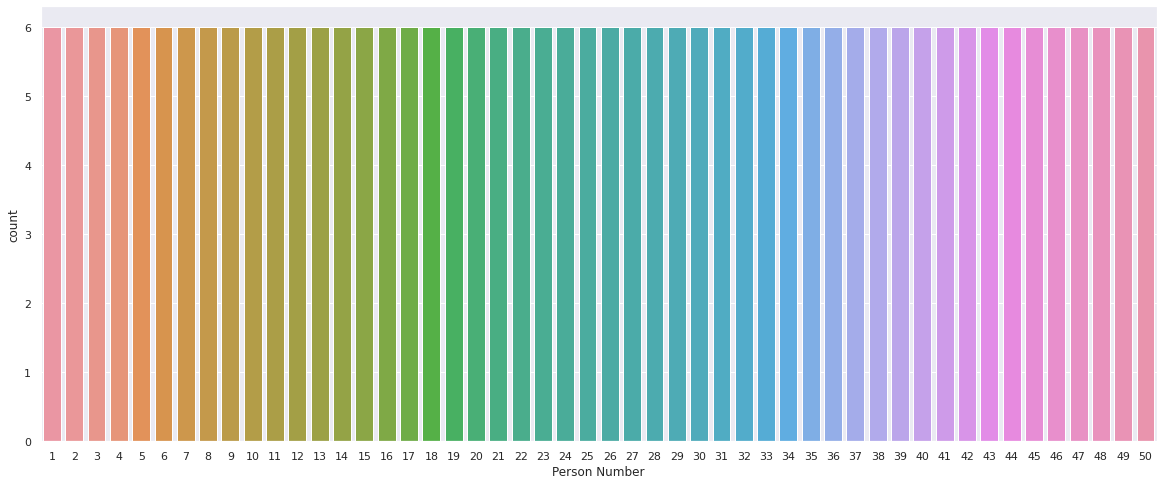

In [ ]:
sns.countplot(x='Person Number', data=df)
sns.set(rc = {'figure.figsize':(20,8)})

Each of the 50 people has 6 sub-bands, as it should be.

In [ ]:
df = pd.DataFrame(data=df, index=np.arange(3700))
display(df)

In [ ]:
#Changing of 'Person Number' Column
list1 = list()
list_person_number = list()
for i in range(1,51):
    list1 = [i] * 74
    list_person_number += list1

print(f'Length of list_person_number -> {len(list_person_number)}')

df['Person Number'] = list_person_number
display(df)

In [ ]:
df['CH7_Teta']  = ""
df['CH7_Alpha'] = ""
df['CH7_Beta']  = ""
df['CH8_Teta']  = ""
df['CH8_Alpha'] = ""
df['CH8_Beta']  = ""

display(df)

In [ ]:
list_CH7_Teta = []
list_CH7_Alpha = []
list_CH7_Beta = []
list_CH8_Teta = []
list_CH8_Alpha = []
list_CH8_Beta = []

In [ ]:
for i in range(0,300,6):
    list_CH7_Teta += np.split(df['Sample Values'][i],(37000/500))
df['CH7_Teta'] = list_CH7_Teta

for i in range(1,300,6):
    list_CH7_Alpha += np.split(df['Sample Values'][i],(37000/500))
df['CH7_Alpha'] = list_CH7_Alpha

for i in range(2,300,6):
    list_CH7_Beta += np.split(df['Sample Values'][i],(37000/500))
df['CH7_Beta'] = list_CH7_Beta

for i in range(3,300,6):
    list_CH8_Teta += np.split(df['Sample Values'][i],(37000/500))
df['CH8_Teta'] = list_CH8_Teta

for i in range(4,300,6):
    list_CH8_Alpha += np.split(df['Sample Values'][i],(37000/500))
df['CH8_Alpha'] = list_CH8_Alpha

for i in range(5,300,6):
    list_CH8_Beta += np.split(df['Sample Values'][i],(37000/500))
df['CH8_Beta'] = list_CH8_Beta

display(df)

KeyError: ignored

In [ ]:
df.drop(['Sub-band Type','Sample Values'], axis=1, inplace=True)
display(df)


In [ ]:
y = df['Person Number'].values
x = df.drop('Person Number', axis=1).values


c0=[]
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
for i in x:

  # print(i[0].shape)
  c0.append(i[0]) 
  c1.append(i[1]) 
  c2.append(i[2]) 
  c3.append(i[3]) 
  c4.append(i[4]) 
  c5.append(i[5]) 



c0=np.asarray(c0)
c1=np.asarray(c1)
c2=np.asarray(c2)
c3=np.asarray(c3)
c4=np.asarray(c4)
c5=np.asarray(c5)


print(c1.shape)



x=np.stack([c0, c1, c2,c3,c4,c5], axis=2)
x=np.squeeze(x, axis=3)
print(x.shape)



(3700, 500, 1)
(3700, 500, 6)


#SPLIT DATASET

In [ ]:



x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=8)

# print(len(x_train))
# np.array(list(x_train), dtype=np.float)

# print(len(x_train))
# print((x_train.shape))
# x_train = np.vstack(x_train[1,:]).astype(float)
# x_test = np.vstack(x_test[:, 1]).astype(float)
# y_train = np.vstack(y_train[:]).astype(float)
# y_test = np.vstack(y_test[:]).astype(float)

# print(" ")
# print(len(x_train))
# print((x_train.shape))


#INSPECT DATA

In [ ]:


xray(x_train)
xray(x_test)
xray(y_train)
xray(y_test)

# x_train = np.asarray(x_train).astype('float32')
# x_test = np.asarray(x_test).astype('float32')
# y_train = np.asarray(y_train).astype('float32')
# y_test = np.asarray(y_test).astype('float32')


model = Sequential()

model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=3, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

earlyStopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

model.compile(loss='categorical_crossentropy',optimizer='adam')

model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), epochs=100, verbose=1, callbacks=[earlyStopping])

np.array,  Shape: (2960, 500, 6)
np.array,  Shape: (740, 500, 6)
np.array,  Shape: (2960,)
np.array,  Shape: (740,)
Epoch 1/100


ValueError: ignored

In [ ]:
print(type(x_train[1][1]))

<class 'numpy.ndarray'>


In [ ]:
print(x_train[0])

[array([[ -0.30149114],
       [  1.00222397],
       [  2.2426784 ],
       [  3.36756311],
       [  4.3292913 ],
       [  5.08692889],
       [  5.60786322],
       [  5.86914402],
       [  5.85844282],
       [  5.57459228],
       [  5.02768332],
       [  4.23871587],
       [  3.23881609],
       [  2.06804992],
       [  0.77387801],
       [ -0.59068799],
       [ -1.9691561 ],
       [ -3.30377105],
       [ -4.53779156],
       [ -5.61773979],
       [ -6.49553503],
       [ -7.13042819],
       [ -7.49066122],
       [ -7.55478661],
       [ -7.31259544],
       [ -6.76561706],
       [ -5.92716981],
       [ -4.82195947],
       [ -3.48524012],
       [ -1.96156893],
       [ -0.30320179],
       [  1.43181008],
       [  3.18175055],
       [  4.88351515],
       [  6.47494724],
       [  7.89714533],
       [  9.09665454],
       [ 10.02745992],
       [ 10.6527062 ],
       [ 10.94607927],
       [ 10.89279784],
       [ 10.49017918],
       [  9.74775869],
       [  

In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape  = ',x_test.shape)
print('y_test.shape  = ',y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
x_train.shape =  (2960, 6)
y_train.shape =  (2960,)
x_test.shape  =  (740, 6)
y_test.shape  =  (740,)
